In [1]:
import pandas as pd
import anndata

import seaborn as sns
import matplotlib.pyplot as plt

from ALLCools.plot import *
from ALLCools.clustering import calculate_direct_confusion

In [2]:
adata = anndata.read_h5ad('../../snmC_and_snm3C/snmC_snm3C_integration.coords.h5ad')

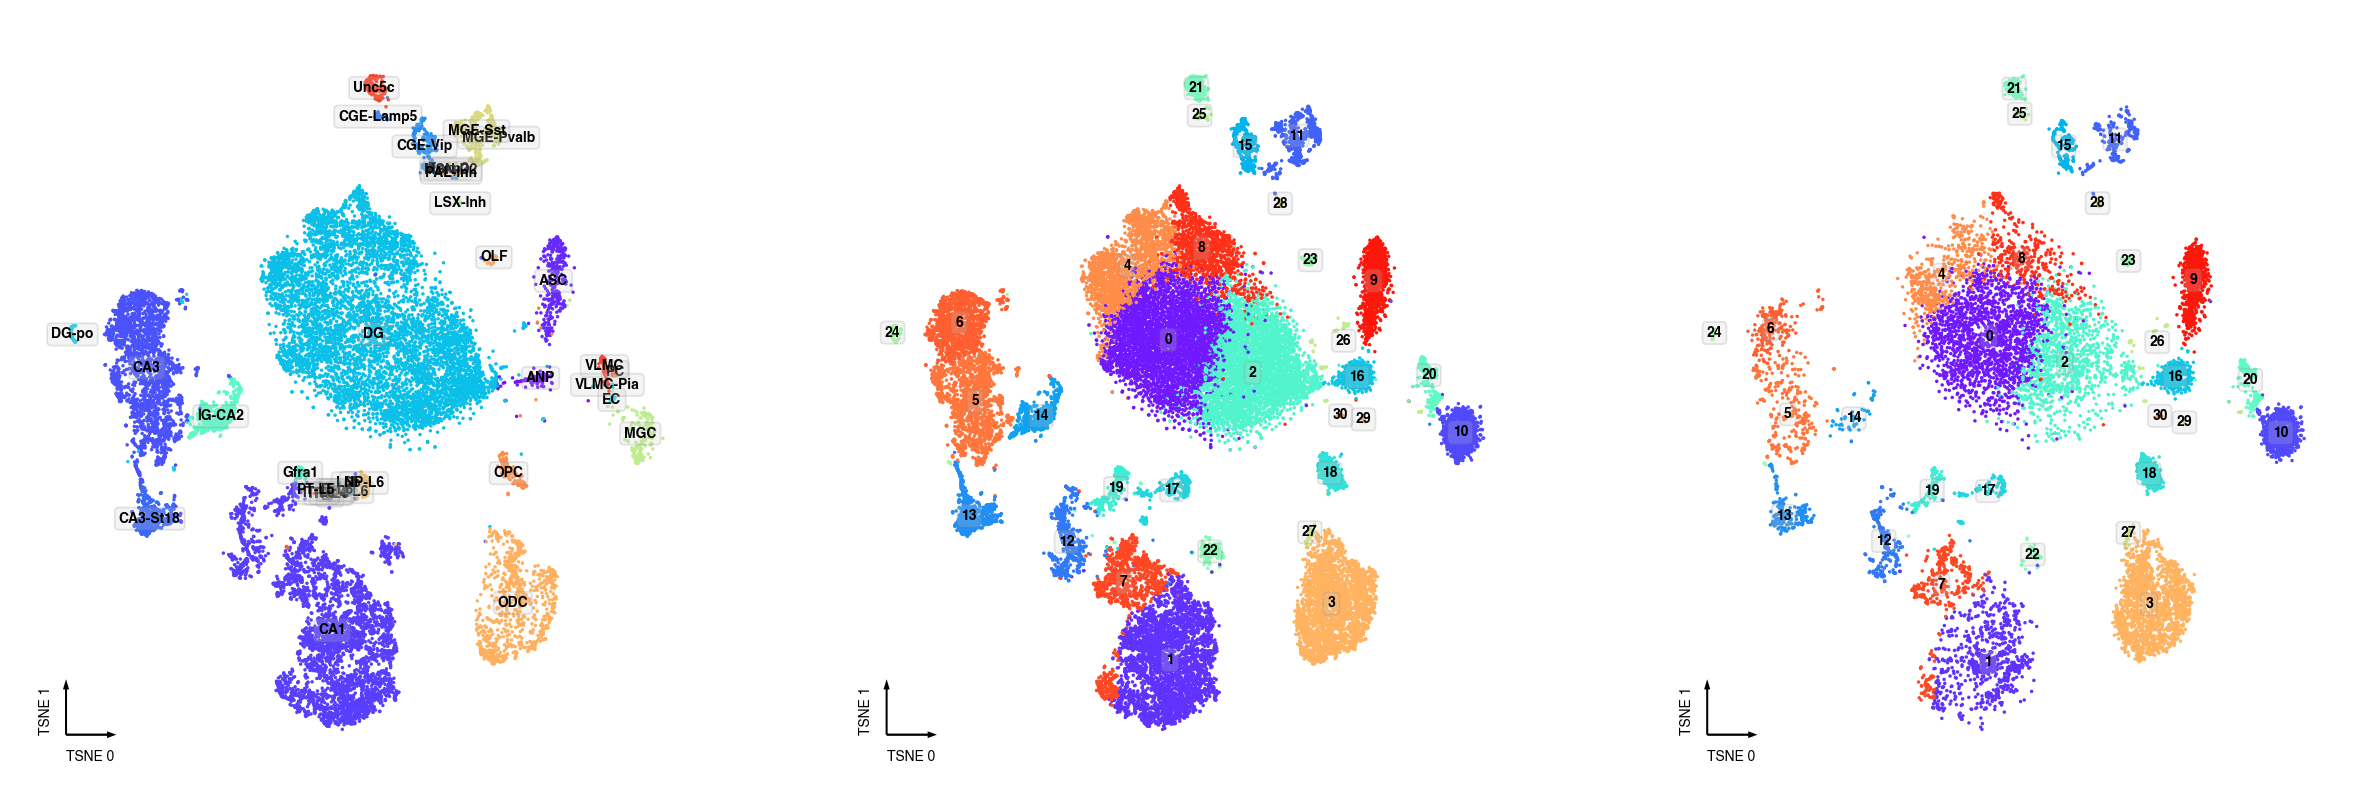

In [3]:
annot = pd.read_csv(
    '../../../../data/Brain/snmC-seq2/HIP.Annotated.CellMetadata.csv.gz',
    index_col=0)
adata.obs['mCCellTypeAnno'] = annot['MajorType']

fig, axes = plt.subplots(figsize=(12, 4), dpi=250, ncols=3)
ax = axes[0]
categorical_scatter(ax=ax,
                    coord_base='tsne',
                    hue='mCCellTypeAnno',
                    data=adata.obs[adata.obs['batch'] == 'snmC'],
                    scatter_kws=dict(color='lightgray', zorder=0),
                    text_anno='mCCellTypeAnno',
                    s=1,
                    max_points=None)
ax = axes[1]
categorical_scatter(ax=ax,
                    coord_base='tsne',
                    hue='leiden',
                    data=adata.obs,
                    scatter_kws=dict(color='lightgray', zorder=0),
                    text_anno='leiden',
                    s=1,
                    max_points=None)
ax = axes[2]
categorical_scatter(ax=ax,
                    coord_base='tsne',
                    hue='leiden',
                    data=adata.obs[adata.obs['batch'] == 'snm3C'],
                    scatter_kws=dict(color='lightgray', zorder=0),
                    text_anno='leiden',
                    s=1,
                    max_points=None)

del adata.obs['mCCellTypeAnno']
pass

In [4]:
cluster_anno = {
    '0': 'DG',
    '1': 'Exc',
    '2': 'DG',
    '3': 'Glia',
    '4': 'DG',
    '5': 'Exc',
    '6': 'Exc',
    '7': 'Exc',
    '8': 'DG',
    '9': 'Glia',
    '10': 'Glia',
    '11': 'Inh',
    '12': 'Exc',
    '13': 'Exc',
    '14': 'Exc',
    '15': 'Inh',
    '16': 'Glia',
    '17': 'Other',
    '18': 'Glia',
    '19': 'Exc',
    '20': 'Glia',
    '21': 'Inh',
    '22': 'Exc',
    '23': 'Other',
    '24': 'Exc',
    '25': 'Inh',
    '26': 'DG',
    '27': 'Glia',
    '28': 'Other',
    '29': 'Exc',
    '30': 'DG',
}
adata.obs['IntegrationGroup'] = adata.obs['leiden'].map(cluster_anno)

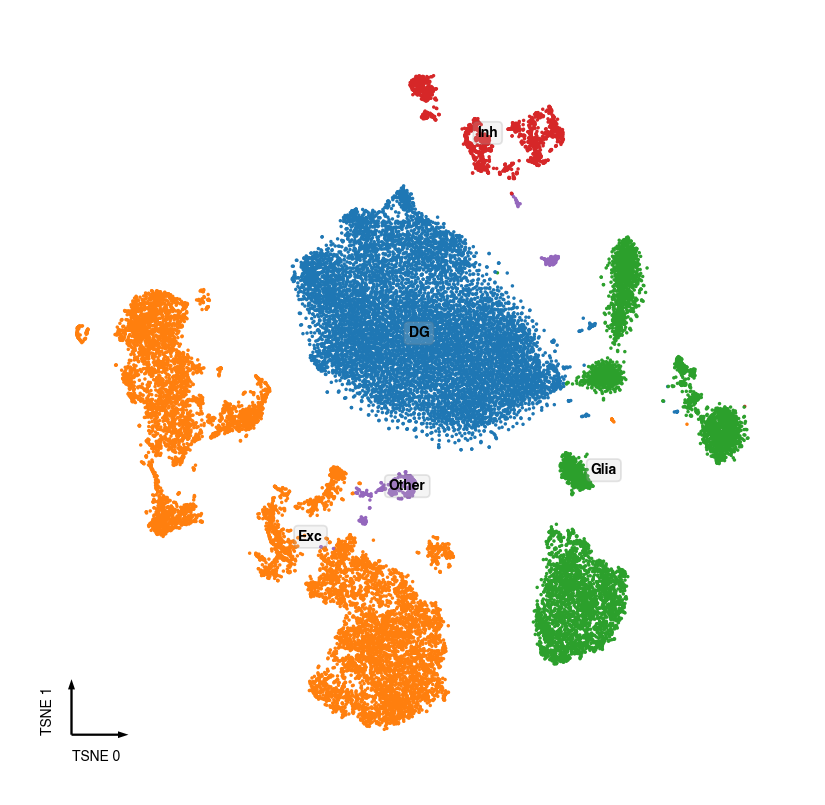

In [5]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=250)
categorical_scatter(ax=ax,
                    coord_base='tsne',
                    hue='IntegrationGroup',
                    data=adata.obs,
                    text_anno='IntegrationGroup',
                    s=1,
                    max_points=None)
pass

In [6]:
adata.obs[['batch', 'IntegrationGroup']].to_csv('snmC_snm3C_integration_groups.csv')